In [439]:
import pandas as pd
from matplotlib import pyplot as plt 

In [440]:
# read csv
data=pd.read_csv("https://raw.githubusercontent.com/kedeisha1/Challenges/main/netflix_titles.csv")

In [441]:
# size of the dataset
data.shape

(8807, 12)

In [442]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 1.Is there any missing data? Deal with them accordingly.

In [443]:
#find how many missing fields in every column
missing = data.isnull().sum()
print(missing)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## 2.Using the ‘date_added’ column a new column called ‘year_added’ that only has the year the title was added.

## 3.Using the ‘date_added’ column a new column called ‘month_added’ that only has the month the title was added.


In [444]:
# change the 'date_added' to datetime data type to get year and month later

data['date_added']=pd.to_datetime(data['date_added'])

#add two columns using dt.year, dt.month
data['year_added']=data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month

## 4.Check the data types. Anything look odd? Adjust accordingly.

In [445]:
# checking the data types. notice the 'year_added' and 'month_added' are float instead of int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


In [446]:
# create a new data set by dropping null values in the date columns to make it easier for changing the datatype
data_cleaned = data.dropna(subset=['date_added','month_added','year_added'])
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7972 non-null   object        
 5   country       7967 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [447]:
#Use.copy() to avoid SettingWithCopyWarning
data_cleaned = data_cleaned.copy()

#change the data types
data_cleaned['year_added'] = data_cleaned['year_added'].astype(int)
data_cleaned['month_added'] = data_cleaned['month_added'].astype(int) 
data_cleaned['title'] = data_cleaned['title'].astype(str)


data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7972 non-null   object        
 5   country       7967 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8797 non-null   int64         
 13  month_added   8797 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 1.0+ MB


## 5.What is the most popular release year for movies on Netflix?

In [448]:
popular_year_released = data_cleaned.groupby(data_cleaned['release_year']).size()
popular_year_released = popular_year_released.sort_values(ascending = False).head(1)
print(popular_year_released)

release_year
2018    1146
dtype: int64


## 6. What year did Netflix add the most content to its platform?

In [459]:
#group by year. Use size() to know the count
popular_year_added = data_cleaned.groupby(data_cleaned['year_added']).size()

# sort the values in descending
popular_year_added = popular_year_added.sort_values(ascending=False).head(1)
print(popular_year_added)

year_added
2019    2016
dtype: int64


## 7.What is the movie with the longest title in the dataset?

In [451]:
#condition=get the movie title which matches max length of movie title and type is movie
longest_title=data_cleaned[(data_cleaned['title'].str.len() == max(data_cleaned['title'].str.len()))
                           &(data_cleaned['type']=='Movie')]

print(longest_title['title'])

5164    Jim & Andy: The Great Beyond - Featuring a Ver...
Name: title, dtype: object


## 8.What are the top 5 most popular movie genres?

In [456]:
#filter only the movies
popular_movies=data_cleaned[data_cleaned['type']=='Movie']
#group by genre and find the count
popular_movies=data_cleaned.groupby(data_cleaned['listed_in']).count()
#sort the numbers descending using by
popular_movies=popular_movies.sort_values(by='show_id',ascending=False).head()
print(popular_movies['title'])

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: title, dtype: int64


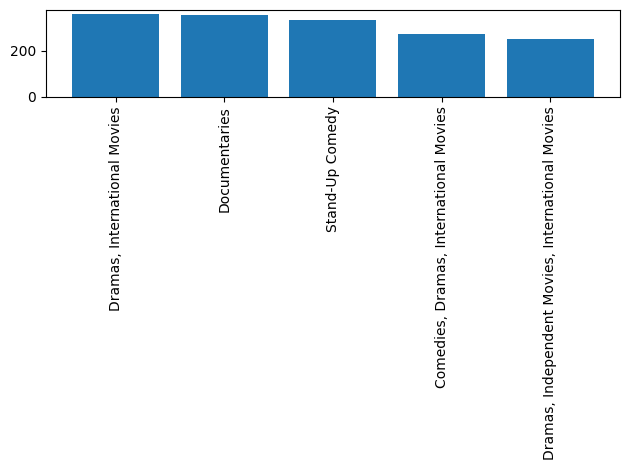

In [467]:
#assign the index of types to genre and values to values to make it easier to plot
genre=popular_movies.index
values=popular_movies['show_id']
plt.bar(genre, values)


plt.xticks(rotation=90) 
plt.tight_layout()

## 9.Create a pie chart visualizing the proportion of movies vs TV shows. Label each section with the percentage.

In [468]:
#group by type
types=data_cleaned.groupby(data_cleaned['type']).size()
print(types)

type
Movie      6131
TV Show    2666
dtype: int64


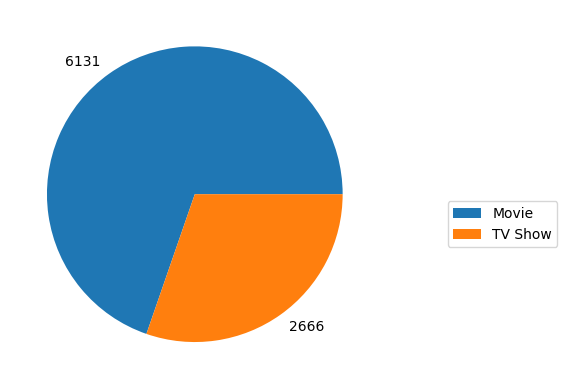

In [469]:
# use pie chart to plot. add lanels using labels
plt.pie(types,labels=types.values)

#create legend
plt.legend(types.index, bbox_to_anchor=(1.5,0.5))